In [1]:
import requests
import pandas as pd
from datetime import date, datetime

In [2]:
url = "https://www.starbucks.co.kr/store/getStore.do?r=3E00WPUFS8"

In [3]:
payload = {"in_biz_cds": "0",
"in_scodes": "0",
"ins_lat": "36.47888180965931",
"ins_lng": "126.73776862419669",
"search_text": "",
"p_sido_cd": "",
"p_gugun_cd": "",
"in_distance": "0",
"in_biz_cd": "",
"isError": "false",
"searchType": "A",
"set_date": "",
"all_store": "1",
"T03": "0",
"T01": "0",
"T27": "0",
"T12": "0",
"T09": "0",
"T30": "0",
"T05": "0",
"T22": "0",
"T21": "0",
"T10": "0",
"T36": "0",
"T43": "0",
"T48": "0",
"Z9999": "0",
"P10": "0",
"P50": "0",
"P20": "0",
"P60": "0",
"P30": "0",
"P70": "0",
"P40": "0",
"P80": "0",
"whcroad_yn": "0",
"P90": "0",
"P01": "0",
"new_bool": "0",
"iend": "2000",
"rndCod": "F7L0R1E812",}

In [4]:
r = requests.post(url, data=payload)
df = pd.DataFrame(r.json()['list'])
df2 = df[df.isnull().sum()[~(df.isnull().sum() > 600)].index].copy()
pd.set_option('display.max_columns', None)
df2.head(1)

,seq,p_pro_seq,p_sido_cd,p_gugun_cd,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,theme_state,new_bool,search_text,ins_lat,ins_lng,in_distance,out_distance,all_search_cnt,addr_search_cnt,store_search_cnt,rowCount,store_nm,store_cd,s_biz_code,new_icon,set_user,favorites,defaultimage,in_biz_cds,in_scodes,vSal,istart,iend,open_dt,gold_card,ip_lat,ip_long,espresso,new_store,premiere_food,doro_address,cold_blew,my_siren_order_store_yn,whcroad_yn,skuNo,skuName,skuImgUrl,stock_count,store_area_code,lat,lot,t20,t04,t03,t01,t12,t09,t06,t10,p10,p50,p20,p60,p30,p70,p40,p80,t22,t21,p90,p01,t05,t30,t36,t27,t29,t43,t48,z9999,p02
0,0,0,,,885,창원상남사거리,1522-3232,055-264-7865,10,경남,1010,창원시,경상남도 창원시 성산구 상남동 22-7,Z9999@T05@T08@T16@T17@T20@T21@T30@@T52@T62@T09,0,,,,0,224.36,-1,-1,-1,30,,0,3064,N,,0,/upload/store/2019/02/[3064]_20190222050843_9b...,0,0,,1,60,20150120,0,,,,,,경상남도 창원시 성산구 단정로 25,,N,WHCROAD,,,,0,A11,35.2201968,128.6834225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df2[df2['my_siren_order_store_yn']=='Y']

,seq,p_pro_seq,p_sido_cd,p_gugun_cd,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,theme_state,new_bool,search_text,ins_lat,ins_lng,in_distance,out_distance,all_search_cnt,addr_search_cnt,store_search_cnt,rowCount,store_nm,store_cd,s_biz_code,new_icon,set_user,favorites,defaultimage,in_biz_cds,in_scodes,vSal,istart,iend,open_dt,gold_card,ip_lat,ip_long,espresso,new_store,premiere_food,doro_address,cold_blew,my_siren_order_store_yn,whcroad_yn,skuNo,skuName,skuImgUrl,stock_count,store_area_code,lat,lot,t20,t04,t03,t01,t12,t09,t06,t10,p10,p50,p20,p60,p30,p70,p40,p80,t22,t21,p90,p01,t05,t30,t36,t27,t29,t43,t48,z9999,p02


In [6]:
df2['p_sido_cd'].value_counts()

p_sido_cd
    1887
Name: count, dtype: int64

100%|██████████| 17/17 [00:03<00:00,  5.03it/s]


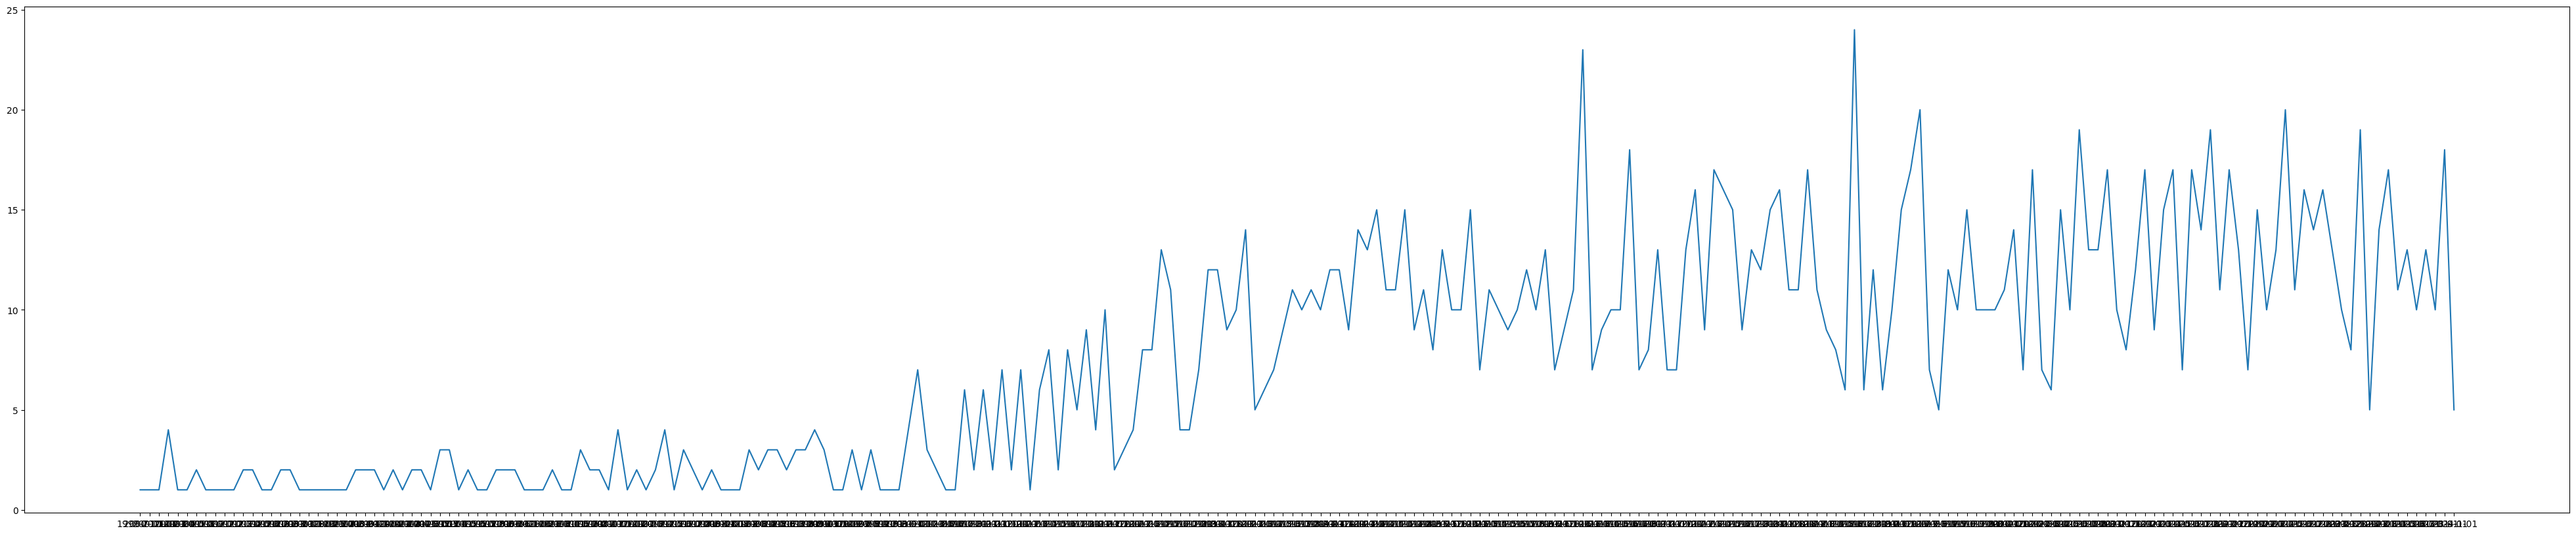

In [7]:
import requests
import pandas as pd 
from tqdm import tqdm

url_cd = "https://www.starbucks.co.kr/store/getSidoList.do"
r = requests.post(url_cd)
url_place = "https://www.starbucks.co.kr/store/getStore.do?r=6DKBI0DUO3"

total = []
for x in tqdm(r.json()['list']):
    #print(x['sido_nm'], x['sido_cd'])
    payload['p_sido_cd'] = x['sido_cd']
    r = requests.post(url_place, data=payload)
    total.append(pd.DataFrame(r.json()['list']))
starbuck_df = pd.concat(total)


star_df = starbuck_df.loc[:,~(starbuck_df.isnull().sum() > 1800)].copy()

star_df['DT'] = star_df['s_name'].apply(lambda x : "DT" in x)

star_df.groupby('sido_name')['DT'].sum().sort_values()


star_df['open_dt'] = pd.to_datetime(star_df['open_dt'])
star_df['open'] = star_df['open_dt'].apply(lambda x : f"{x.year}-{x.month}-01")
star_series = star_df.groupby('open', as_index=False)[['s_name']].count()
import matplotlib.pyplot as plt 

plt.figure(figsize=(50, 10))
#plt.scatter(star_series['open'],star_series['s_name'])
plt.plot(star_series['open'],star_series['s_name'])
plt.show()


In [8]:
from urllib import request
import os 
if os.path.isdir("./starbucks") == False:
    os.mkdir("./starbucks")
image_url = "https://www.starbucks.co.kr"
for idx, row in tqdm(star_df.iterrows()):
    img = row['defaultimage']
    request.urlretrieve(image_url + img, f"./starbucks/{row['s_name']}.jpg")   


49it [00:08,  5.51it/s]


KeyboardInterrupt: 

In [9]:
from urllib import request, error
import os
import time

if not os.path.exists("./starbucks"):
    os.makedirs("./starbucks")

image_url_prefix = "https://www.starbucks.co.kr"

def download_image(img_url, save_path):
    retry_count = 3
    while retry_count > 0:
        try:
            request.urlretrieve(img_url, save_path)
            print(f"Image downloaded successfully: {save_path}")
            return True
        except (error.HTTPError, error.URLError, IncompleteRead) as e:
            print(f"Error downloading image. Retrying... ({retry_count} attempts left)")
            retry_count -= 1
            time.sleep(1)  # 재시도 전에 잠시 대기
    print(f"Failed to download image: {save_path}")
    return False

for idx, row in star_df.iterrows():
    img_url = image_url_prefix + row['defaultimage']
    save_path = f"./starbucks/{row['s_name']}.jpg"
    
    download_image(img_url, save_path)

Image downloaded successfully: ./starbucks/역삼아레나빌딩.jpg
Image downloaded successfully: ./starbucks/논현역사거리.jpg
Image downloaded successfully: ./starbucks/신사역성일빌딩.jpg
Image downloaded successfully: ./starbucks/국기원사거리.jpg
Image downloaded successfully: ./starbucks/대치재경빌딩.jpg
Image downloaded successfully: ./starbucks/봉은사역.jpg
Image downloaded successfully: ./starbucks/압구정윤성빌딩.jpg
Image downloaded successfully: ./starbucks/코엑스별마당.jpg
Image downloaded successfully: ./starbucks/삼성역섬유센터R.jpg
Image downloaded successfully: ./starbucks/압구정R.jpg
Image downloaded successfully: ./starbucks/수서역R.jpg
Image downloaded successfully: ./starbucks/양재강남빌딩R.jpg
Image downloaded successfully: ./starbucks/선릉동신빌딩R.jpg
Image downloaded successfully: ./starbucks/봉은사로선정릉.jpg
Image downloaded successfully: ./starbucks/강남오거리.jpg
Image downloaded successfully: ./starbucks/스타필드코엑스몰R.jpg
Image downloaded successfully: ./starbucks/강남구청정문.jpg
Image downloaded successfully: ./starbucks/도곡공원.jpg
Image downloaded successfu

NameError: name 'IncompleteRead' is not defined